In [ ]:
%%capture 
!pip install category_encoders==2.*
!pip install pandas_profiling==2.*

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from category_encoders import OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from pandas_profiling import ProfileReport
#from google.colab import drive
#drive.mount('/content/gdrive')

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
%cd /content/gdrive/My Drive/Kaggle

/content/gdrive/My Drive/Kaggle


In [ ]:
!ls

kaggle.json	    sample_submission.csv  train_features.csv
new_submission.csv  test_features.csv	   train_labels.csv


In [ ]:
train = pd.merge(pd.read_csv('train_features.csv'), pd.read_csv('train_labels.csv'))

In [ ]:
train.shape

(47520, 41)

In [ ]:
def wrangle(df):
  
  df.set_index('id', inplace = True)

  df.drop(columns = ['recorded_by', 'scheme_name', 'ward'], inplace = True)

  df.drop(columns= ['quantity_group', 'waterpoint_type_group', 'source_type'], inplace = True)

  cols_to_drop = [col for col in df.select_dtypes('object') if df[col].nunique() > 200]
  df.drop(columns = cols_to_drop, inplace = True)
  
  df.drop(columns = 'num_private', inplace = True)

  return df
train = wrangle(train)

In [ ]:
train.isna().sum()

amount_tsh                  0
gps_height                  0
longitude                   0
latitude                    0
basin                       0
region                      0
region_code                 0
district_code               0
lga                         0
population                  0
public_meeting           2689
scheme_management        3102
permit                   2439
construction_year           0
extraction_type             0
extraction_type_group       0
extraction_type_class       0
management                  0
management_group            0
payment                     0
payment_type                0
water_quality               0
quality_group               0
quantity                    0
source                      0
source_class                0
waterpoint_type             0
status_group                0
dtype: int64

In [ ]:
target = 'status_group'
y = train[target]
X = train.drop(columns = target)

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = .2, random_state = 42)

In [ ]:
y_train.value_counts(normalize= True)

functional                 0.544087
non functional             0.381866
functional needs repair    0.074048
Name: status_group, dtype: float64

In [ ]:
print('Baseline Accuracy:',y_train.value_counts(normalize=True).max())

Baseline Accuracy: 0.5440867003367004


In [ ]:
model = make_pipeline(
    SimpleImputer(strategy = 'most_frequent'),
    OrdinalEncoder(),
    DecisionTreeClassifier(random_state = 42)
)

model.fit(X_train, y_train)

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='most_frequent')),
                ('ordinalencoder',
                 OrdinalEncoder(cols=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                      13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                      23, 24, 25, 26],
                                mapping=[{'col': 0, 'data_type': dtype('O'),
                                          'mapping': 0.0          1
30.0         2
50.0         3
250.0        4
200.0        5
            ..
5400.0      88
200000.0    89
306.0       90
220.0       91
NaN         -2
Length: 92, dtype: int64},
                                         {'col': 1, 'data_type': dtype...
hand dtw                 8
other                    9
unknown                 10
NaN                     -2
dtype: int64},
                                         {'col': 25, 'data_type': dtype('O'),
                                          'mapping': groundwater    1
surface  

In [ ]:
X_train.columns

Index(['amount_tsh', 'gps_height', 'longitude', 'latitude', 'basin', 'region',
       'region_code', 'district_code', 'lga', 'population', 'public_meeting',
       'scheme_management', 'permit', 'construction_year', 'extraction_type',
       'extraction_type_group', 'extraction_type_class', 'management',
       'management_group', 'payment', 'payment_type', 'water_quality',
       'quality_group', 'quantity', 'source', 'source_type', 'source_class',
       'waterpoint_type', 'waterpoint_type_group'],
      dtype='object')

In [ ]:
print('Accuracy Score for Training:', accuracy_score(y_train, model.predict(X_train)))
print('Accuracy Score for Validation:', accuracy_score(y_val, model.predict(X_val)))

Accuracy Score for Training: 0.9951073232323232
Accuracy Score for Validation: 0.6221590909090909


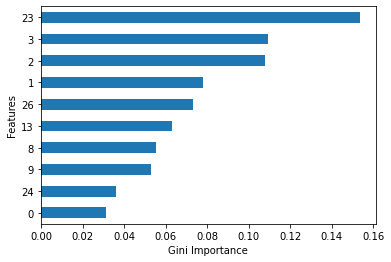

In [ ]:
gini = model.named_steps['decisiontreeclassifier'].feature_importances_
features = model.named_steps['ordinalencoder'].get_feature_names()

pd.Series(data=gini, index=features).sort_values(key=abs).tail(10).plot(kind='barh')
plt.ylabel('Features')
plt.xlabel('Gini Importance');

In [ ]:
X_test = pd.read_csv('test_features.csv')
X_test = wrangle(X_test)

In [ ]:
predictions = pd.DataFrame(data = model.predict(X_test), index = X_test.index)

In [ ]:
predictions.columns = ['status_group']

predictions.to_csv('new_submission.csv')

In [ ]:
from google.colab import files
files.download('new_submission.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
predictions.shape

(11880, 1)